In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from mpl_toolkits.mplot3d import Axes3D
import gc

sensor4 = pd.read_excel('data/time_data/Sensor 4_analyte 3 _analyte1_analyte2.xlsx')

sensor4_analyte1 = sensor4[['Analyte 1','Sensor4_analyte1']].rename(columns={'Analyte 1':'CFU/mL','Sensor4_analyte1':'Sensor4'}).sort_values('CFU/mL').reset_index(drop=True)
sensor4_analyte2 = sensor4[['Analyte2','Sensor4_analyte2']].rename(columns={'Analyte2':'CFU/mL','Sensor4_analyte2':'Sensor4'}).sort_values('CFU/mL').reset_index(drop=True)
sensor4_analyte3 = sensor4[['Analyte 3','Sensor4_analyte3']].rename(columns={'Analyte 3':'CFU/mL','Sensor4_analyte3':'Sensor4'}).sort_values('CFU/mL').reset_index(drop=True)

sensor4_analyte1

,CFU/mL,Sensor4
0,3,590
1,29,584
2,86,549
3,344,534
4,3440,500
5,34400,484
6,344000,469
7,3440000,439


In [2]:
combined_data = pd.read_csv('data/labelled/labelled.csv')
analyte1 = combined_data[combined_data['label'] == 1].sort_values('CFU/mL').reset_index(drop=True)
analyte2 = combined_data[combined_data['label'] == 2].sort_values('CFU/mL').reset_index(drop=True)
analyte3 = combined_data[combined_data['label'] == 3].sort_values('CFU/mL').reset_index(drop=True)

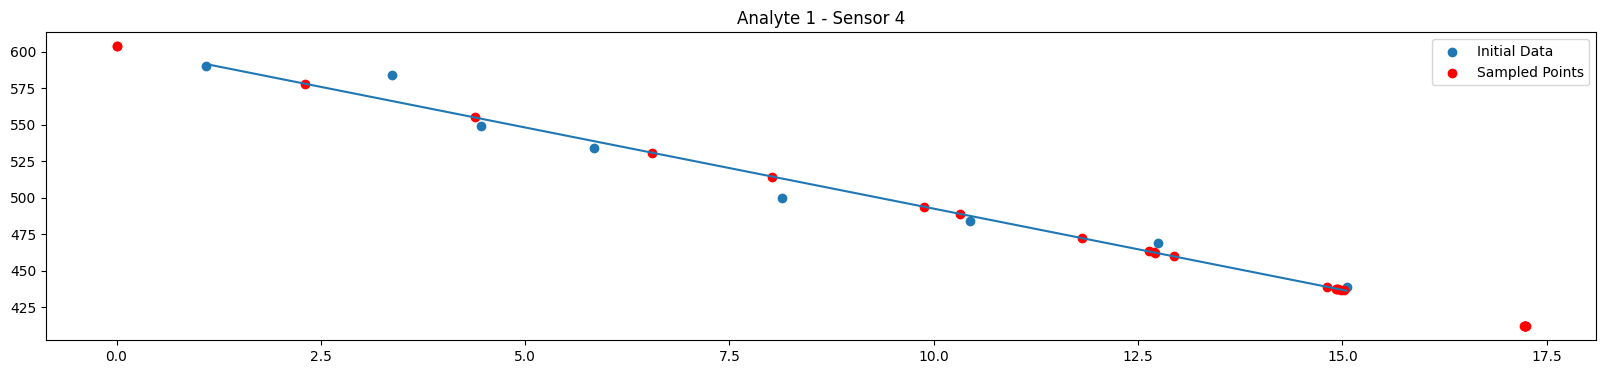

/tmp/ipykernel_35893/962467319.py:19: RuntimeWarning: divide by zero encountered in log
  x_sample = np.log(total_data[i]['CFU/mL'].values)


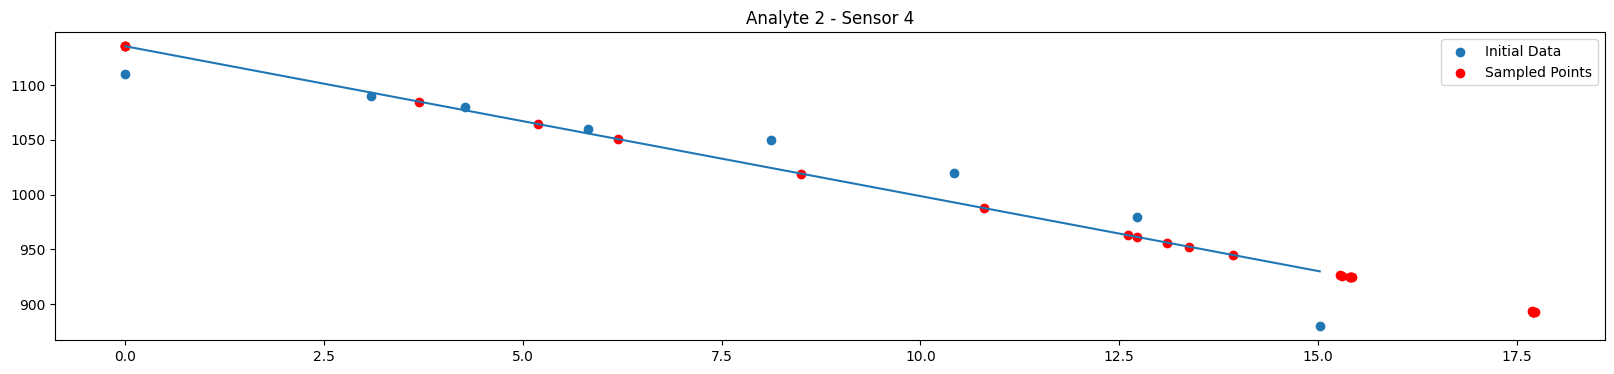

/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_35893/962467319.py:19: RuntimeWarning: divide by zero encountered in log
  x_sample = np.log(total_data[i]['CFU/mL'].values)


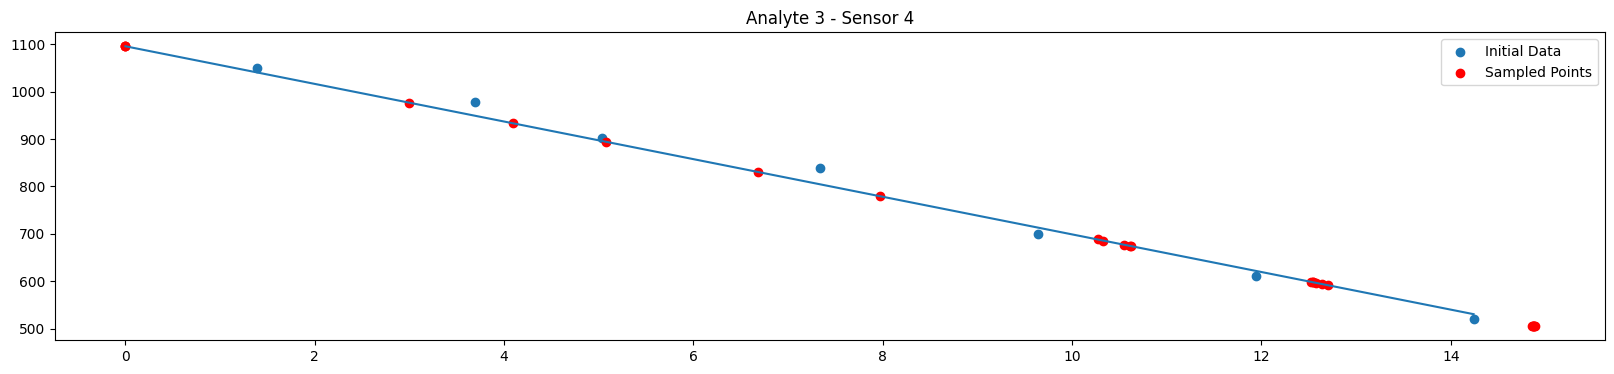

In [3]:
sensor4 = [sensor4_analyte1,sensor4_analyte2,sensor4_analyte3]
total_data = [analyte1,analyte2,analyte3]

for i in range(3):

    plt.figure(figsize=(20,4))
    plt.scatter(np.log(sensor4[i]['CFU/mL']),sensor4[i]['Sensor4'], label='Initial Data')

    X = np.log(sensor4[i]['CFU/mL'])
    X = np.where(np.isfinite(X) & (np.abs(X) < np.finfo(np.float64).max), X, 0)
    Y = sensor4[i]['Sensor4']

    linear_model = LinearRegression()
    linear_model.fit(X.reshape(-1,1), Y)
    pred = linear_model.predict(X.reshape(-1,1))

    plt.plot(X, pred)

    x_sample = np.log(total_data[i]['CFU/mL'].values)
    x_sample = np.where(np.isfinite(x_sample) & (np.abs(x_sample) < np.finfo(np.float64).max), x_sample, 0)

    y_sample = linear_model.predict(x_sample.reshape(-1, 1))
    total_data[i]['Sensor4'] = y_sample

    plt.scatter(x_sample, y_sample, color='red', label='Sampled Points')
    plt.title(f'Analyte {i+1} - Sensor 4')
    plt.legend()
    plt.show()

In [4]:
analyte1 = analyte1[['CFU/mL', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4','label']]
analyte2 = analyte2[['CFU/mL', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'label']]
analyte3 = analyte3[['CFU/mL', 'Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'label']]

analyte1.to_csv('data/labelled/analyte1_4sensors.csv')
analyte2.to_csv('data/labelled/analyte2_4sensors.csv')
analyte3.to_csv('data/labelled/analyte3_4sensors.csv')

## Applying PCA

In [5]:
analyte1 = analyte1[['CFU/mL','Sensor1','Sensor2','Sensor3','Sensor4','label']]
analyte2 = analyte2[['CFU/mL','Sensor1','Sensor2','Sensor3','Sensor4','label']]
analyte3 = analyte3[['CFU/mL','Sensor1','Sensor2','Sensor3','Sensor4','label']]

combined_data = pd.concat([analyte1,analyte2,analyte3], axis=0).reset_index(drop=True)
combined_data.head(5)

,CFU/mL,Sensor1,Sensor2,Sensor3,Sensor4,label
0,1.0,-183.780,-65.50,-68.34,603.707232,1
1,1.0,-150.230,-50.57,-64.37,603.707232,1
2,10.0,-128.550,-35.58,-54.39,578.076975,1
3,80.0,-115.180,-25.25,-36.27,554.930547,1
4,700.0,-112.206,-20.62,-31.24,530.786639,1


/tmp/ipykernel_35893/3197326774.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


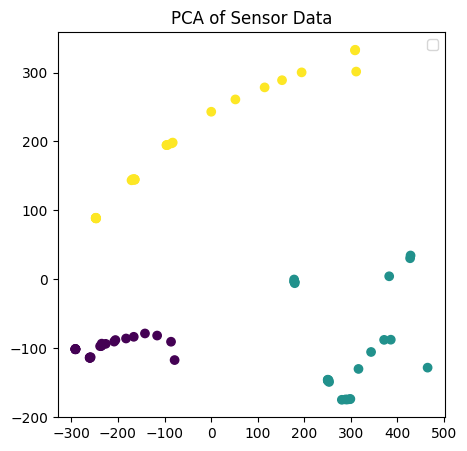

10714

In [6]:
pca = PCA(n_components=2)
X = combined_data[['Sensor1','Sensor2','Sensor3','Sensor4']]
Y = combined_data['label']

X = pca.fit_transform(X)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('PCA of Sensor Data')
plt.legend()
plt.show()

del analyte1, analyte2, analyte3, sensor4_analyte1, sensor4_analyte2, sensor4_analyte3, total_data, sensor4
gc.collect()

In [7]:
pca_df = pd.DataFrame(X, columns=['PCA1','PCA2'])
pca_df['label'] = Y
pca_df['CFU/mL'] = combined_data['CFU/mL']

In [8]:
# df = pd.DataFrame()
# df['CFU/mL'] = pca_df['CFU/mL']
# df['PC1'] = pca_df['PCA1']
# df['PC2_Analyte1'] = [pca_df['PCA2'][i] if pca_df['label'][i] == 1 else np.nan for i in range(len(pca_df))]
# df['PC2_Analyte2'] = [pca_df['PCA2'][i] if pca_df['label'][i] == 2 else np.nan for i in range(len(pca_df))]
# df['PC2_Analyte3'] = [pca_df['PCA2'][i] if pca_df['label'][i] == 3 else np.nan for i in range(len(pca_df))]

# df = df.sample(frac=1)
# df.to_csv('data/labelled/PCA.csv', index=False)
# df.to_excel('data/labelled/PCA.xlsx', index=False)

# df.head(10)

## Applying RF on PCA Data with Sensor 4

In [9]:
data = pca_df[['PCA1','PCA2','label']]
data = data.sample(frac=1)

X = data[['PCA1','PCA2']]
Y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [10]:
param_grid = {
    'n_estimators': [10, 25, 50, 75, 100, 125, 150],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


rf = RandomForestClassifier(random_state=42, bootstrap= True, max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 75)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

rf.fit(X_train, y_train)
best_rf = rf #grid_search.best_estimator_ 
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 1.0000


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


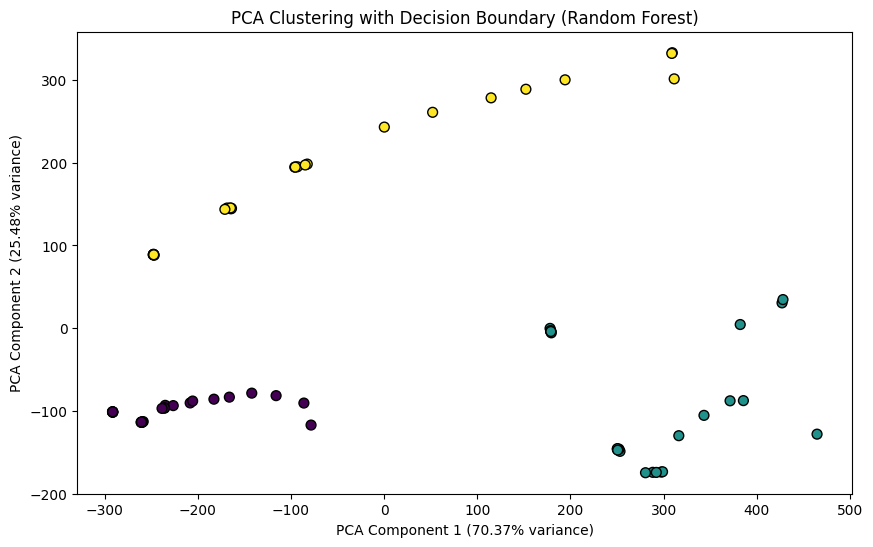

3309

In [11]:
x_min, x_max = X['PCA1'].min() - 1, X['PCA1'].max() + 1
y_min, y_max = X['PCA2'].min() - 1, X['PCA2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = best_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))

plt.scatter(X['PCA1'], X['PCA2'], c=Y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA Clustering with Decision Boundary (Random Forest)')
plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0] * 100:.2f}% variance)')
plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1] * 100:.2f}% variance)')

plt.show()

del rf, best_rf, y_pred, accuracy, x_min, x_max, y_min, y_max, xx, yy, Z
gc.collect()

## Adding Noise Levels

Noise level = 0.05
Training accuracy = 1.0
Test accuracy = 1.0


/tmp/ipykernel_35893/362859298.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x800 with 0 Axes>

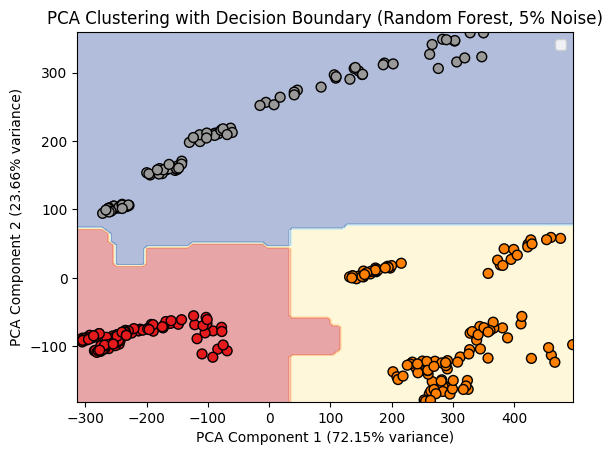

Noise level = 0.1
Training accuracy = 1.0
Test accuracy = 1.0


/tmp/ipykernel_35893/362859298.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x800 with 0 Axes>

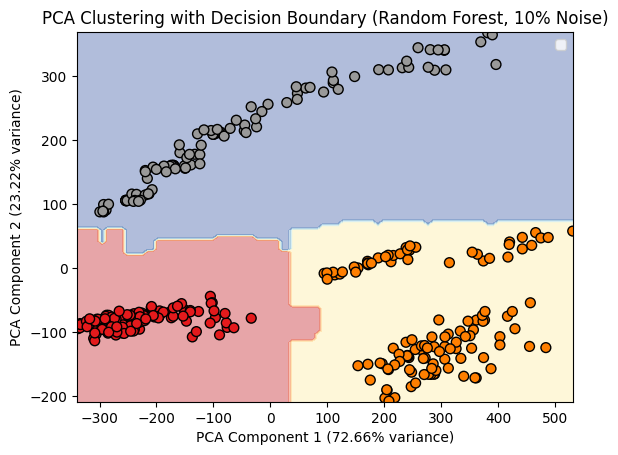

Noise level = 0.15
Training accuracy = 1.0
Test accuracy = 1.0


/tmp/ipykernel_35893/362859298.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x800 with 0 Axes>

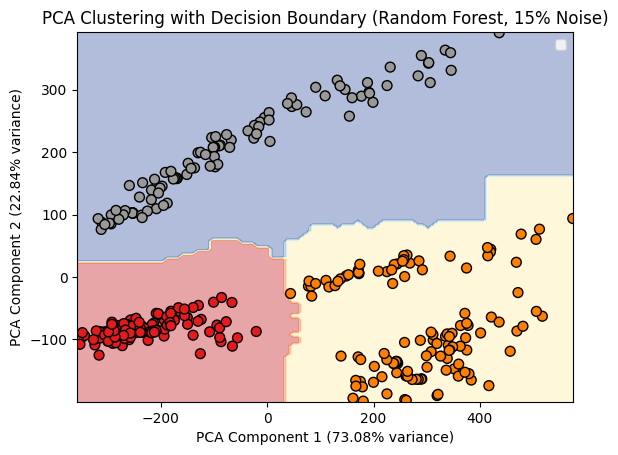

Noise level = 0.2
Training accuracy = 1.0
Test accuracy = 0.9904761904761905


/tmp/ipykernel_35893/362859298.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x800 with 0 Axes>

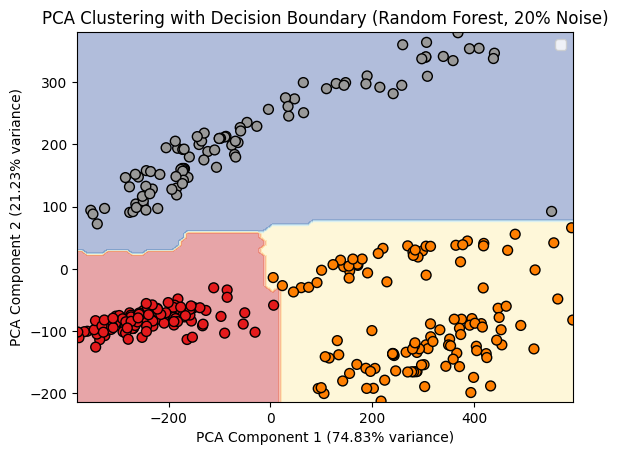

Noise level = 0.25
Training accuracy = 1.0
Test accuracy = 1.0


/tmp/ipykernel_35893/362859298.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x800 with 0 Axes>

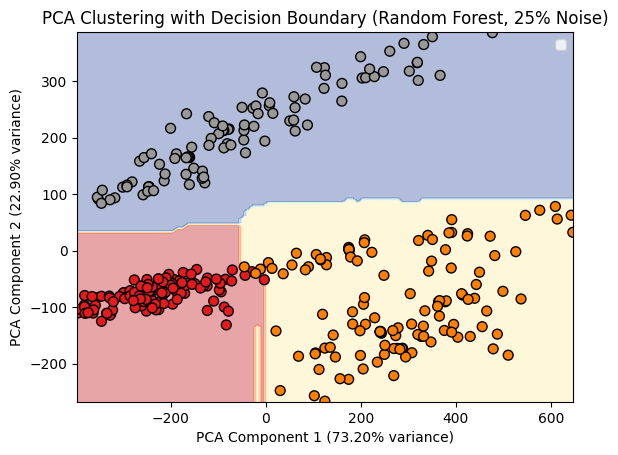

Noise level = 0.3
Training accuracy = 1.0
Test accuracy = 0.9714285714285714


/tmp/ipykernel_35893/362859298.py:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x800 with 0 Axes>

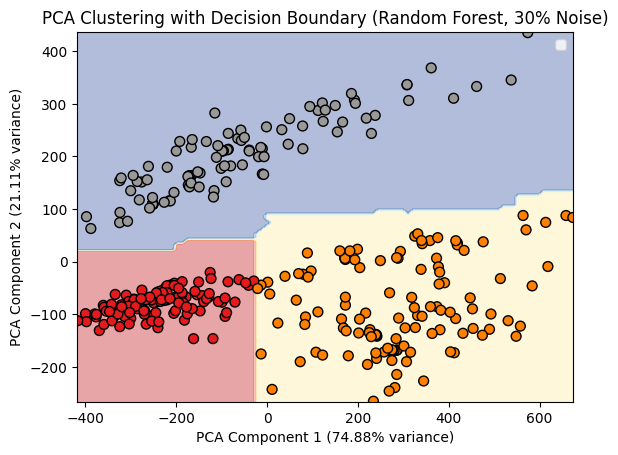

In [13]:
def add_noise(data, labels, noise_level, target_size=350):
    combined_data = data.copy()
    combined_labels = labels.copy()

    while len(combined_data) < target_size:
        noisy_data = data.copy()
        new_data_points = []

        for sensor in ['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']:
            noise = np.random.uniform(-noise_level, noise_level, size=noisy_data.shape[0])
            new_data = noisy_data[sensor] + (noisy_data[sensor] * noise)
            new_data_points.append(new_data)

        new_data_df = pd.DataFrame({
            'Sensor1': new_data_points[0],
            'Sensor2': new_data_points[1],
            'Sensor3': new_data_points[2],
            'Sensor4': new_data_points[3]
        })
        new_labels = labels.copy()

        combined_data = pd.concat([combined_data, new_data_df], ignore_index=True)
        combined_labels = pd.concat([combined_labels, new_labels], ignore_index=True)

    combined_data = combined_data.iloc[:target_size]
    combined_labels = combined_labels.iloc[:target_size]

    return combined_data, combined_labels



def apply_rf_pca_and_plot(noise_level):

    # Adding noise to the data

    noisy_data, noisy_labels = add_noise(combined_data[['Sensor1','Sensor2','Sensor3','Sensor4']], combined_data['label'], noise_level)
    X_pca = pca.fit_transform(noisy_data)  

    # Split into training and testing data

    X_train, X_test, y_train, y_test = train_test_split(X_pca, noisy_labels, test_size=0.3, random_state=42)

    # Random Forest

    rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier_pca.fit(X_train, y_train)  
    
    train_pred = rf_classifier_pca.predict(X_train)
    print('Training accuracy =',accuracy_score(y_train, train_pred))

    y_pred = rf_classifier_pca.predict(X_test)
    print('Test accuracy =',accuracy_score(y_test, y_pred))


    # Plotting
    all_predicted_labels = rf_classifier_pca.predict(X_pca)

    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

    Z = rf_classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    DecisionBoundaryDisplay.from_estimator(rf_classifier_pca, X_pca, grid_resolution=100, cmap=plt.cm.RdYlBu, alpha=0.4)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_predicted_labels, cmap=plt.cm.Set1, edgecolor='k', s=50)
    plt.title(f'PCA Clustering with Decision Boundary (Random Forest, {noise_level*100:.0f}% Noise)')
    plt.xlabel(f'PCA Component 1 ({pca.explained_variance_ratio_[0] * 100:.2f}% variance)')
    plt.ylabel(f'PCA Component 2 ({pca.explained_variance_ratio_[1] * 100:.2f}% variance)')
    plt.legend()
    plt.show()

    del rf_classifier_pca
    del noisy_data, X_pca, X_train, X_test, y_train, y_test
    del x_min, x_max, y_min, y_max, xx, yy, Z, all_predicted_labels, train_pred, y_pred
    gc.collect()



noise_levels = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
for noise in noise_levels:
    print("Noise level =", noise)
    apply_rf_pca_and_plot(noise)

In [1]:
!conda install -c conda-forge -n btpenv ipykernel --update-deps --force-reinstall

/bin/bash: line 1: env: No such file or directory
